In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.drop(columns=['User ID'], inplace = True, axis =1)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [5]:
dataset.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

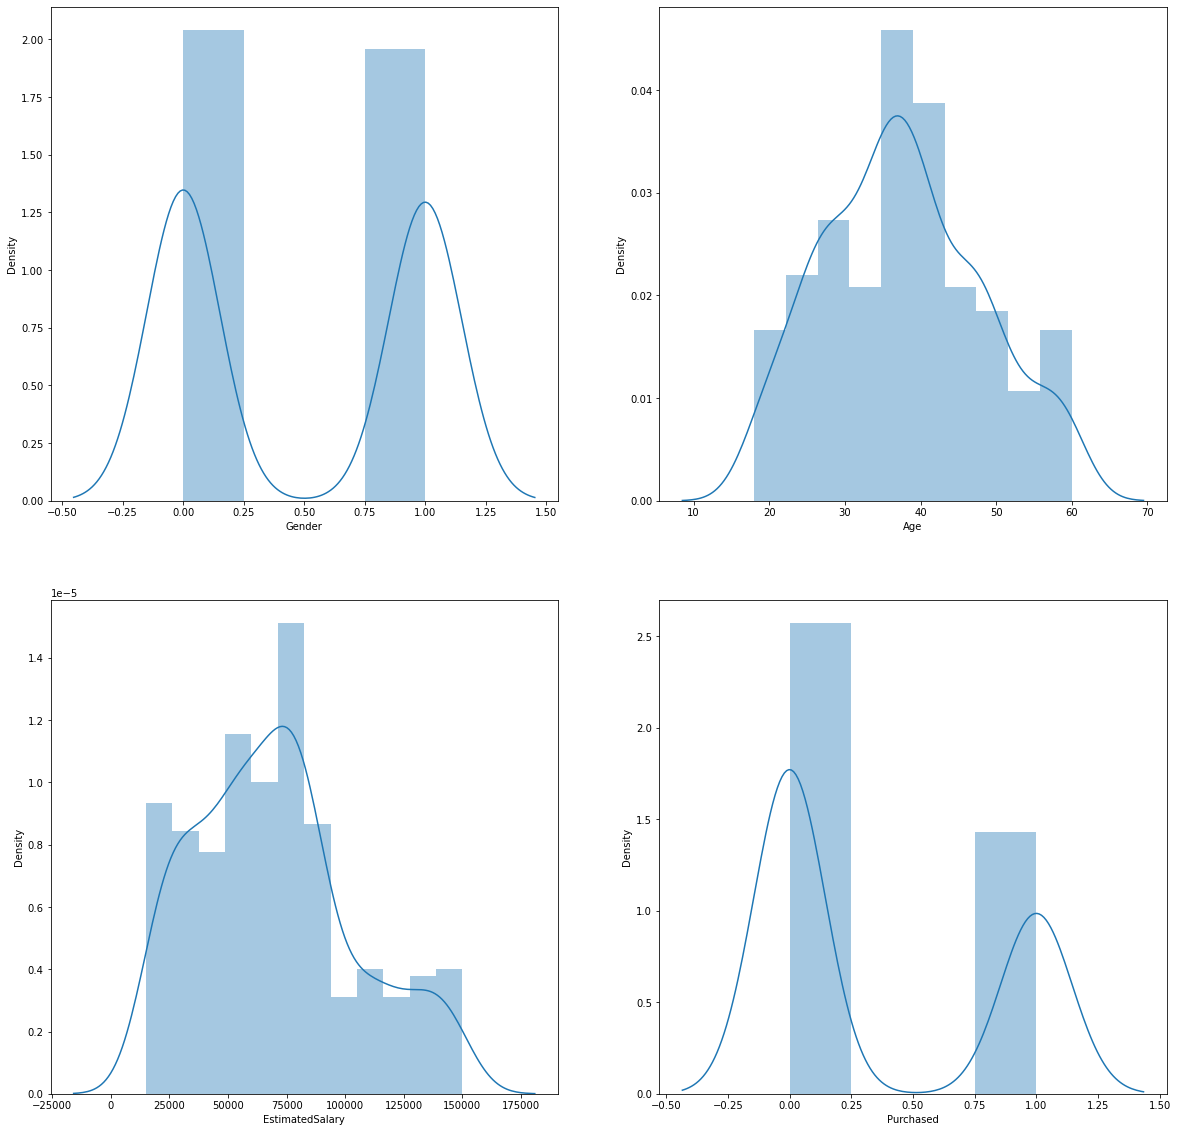

In [6]:
plt.figure(figsize=(20,20),facecolor='white')
num = 1

for col in dataset.columns:
    plt.subplot(2,2,num)
    sns.distplot(dataset[col])
    num += 1

<AxesSubplot:>

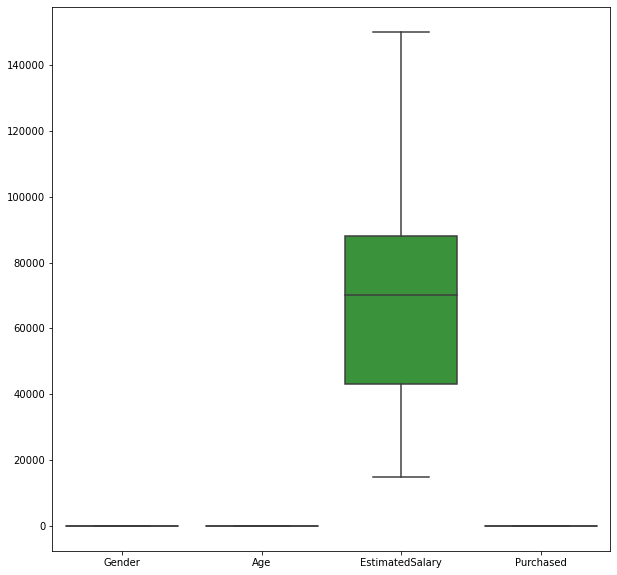

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(data = dataset)

In [8]:
X = dataset.drop(columns='Purchased')
y = dataset['Purchased']

In [9]:
std_scale = StandardScaler()
minmax_scale = MinMaxScaler()

X_minmax = minmax_scale.fit_transform(X)
X_minmax

array([[1.        , 0.02380952, 0.02962963],
       [1.        , 0.4047619 , 0.03703704],
       [0.        , 0.19047619, 0.20740741],
       ...,
       [0.        , 0.76190476, 0.03703704],
       [1.        , 0.42857143, 0.13333333],
       [0.        , 0.73809524, 0.15555556]])

In [10]:
X_scale = std_scale.fit_transform(X)
X_scale

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [12]:
lr_minmax = LogisticRegression()


In [28]:
skf = StratifiedKFold(n_splits=10, shuffle=True , random_state=1)
accuracy_lst = []
for train_indx, test_indx in skf.split(X,y):
    X_train_fold,X_test_fold = X_minmax[train_indx],X_minmax[test_indx]
    y_train_fold,y_test_fold = y[train_indx],y[test_indx]
    lr_minmax.fit(X_train_fold,y_train_fold)
    accuracy_lst.append(lr_minmax.score(X_test_fold,y_test_fold))

print(sum(accuracy_lst)/len(accuracy_lst))
print(accuracy_lst)

0.8125
[0.775, 0.775, 0.85, 0.825, 0.8, 0.875, 0.825, 0.775, 0.775, 0.85]


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=1)

lr_tts = LogisticRegression()
lr_tts.fit(X_train,y_train)
lr_tts.score(X_test,y_test)
y_pred = lr_tts.predict(X_test)

In [32]:
confusion_mat = confusion_matrix(y_test,y_pred)
True_positive = confusion_mat[0][0]
False_positive = confusion_mat[0][1]
False_negative = confusion_mat[1][0]
True_negative = confusion_mat[1][1]


In [33]:
Accuracy = (True_positive+True_negative)/(True_positive+True_negative+False_negative+False_positive)
print('Accuracy : ' + str(Accuracy))
recall = True_positive/(True_positive+False_negative)
print('Recall : '+str(recall))
precision = True_positive/(True_positive+False_positive)
print('Precesion : '+str(precision))
f1_score = (2*recall*precision)/(recall+precision)
print('F1 Score : '+ str(f1_score))

Accuracy : 0.825
Recall : 0.8695652173913043
Precesion : 0.8333333333333334
F1 Score : 0.851063829787234


In [36]:
auc = roc_auc_score(y_test,y_pred)
print('Area under curve : ' + str(auc))

Area under curve : 0.8229166666666667


In [37]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

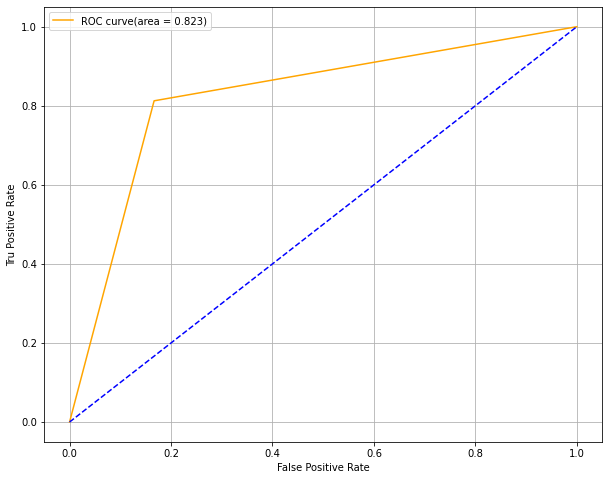

In [44]:
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color = 'orange',label = 'ROC curve(area = {})'.format(round(aur,3)))
plt.plot([0,1],[0,1],linestyle = '--',color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Positive Rate')
plt.grid()
plt.legend(loc = 'upper left')
